In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.metrics import accuracy_score
dataframe = pd.read_csv('Hipertension_Arterial_Mexico_balanced.csv')


In [2]:
dataframe.head(10)

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2.0,45.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,108.0,1.0,24.063708,1.0,1.0
1,2.0,52.0,14.6,26.0,3.2,3.7,42.0,94.0,191.0,0.45,...,64.7,154.0,48.5,33.5,0.0,141.0,4.0,31.283920,0.0,1.0
2,2.0,57.0,14.7,24.0,6.1,3.1,24.0,52.0,106.0,0.58,...,64.7,154.0,48.5,33.5,0.0,109.0,2.0,42.253185,2.0,1.0
3,2.0,51.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,109.0,3.0,31.370681,0.0,1.0
4,2.0,45.0,13.4,29.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,103.0,3.0,21.313342,2.0,0.0
5,2.0,32.0,14.5,20.0,2.5,3.6,38.0,87.0,170.0,0.42,...,64.7,154.0,48.5,33.5,0.0,120.0,4.0,21.089409,1.0,1.0
6,2.0,36.0,11.5,22.0,2.6,3.3,41.0,80.0,126.0,0.51,...,64.7,154.0,48.5,33.5,0.0,118.0,4.0,21.622669,1.0,0.0
7,2.0,29.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,120.0,2.0,24.598958,2.0,1.0
8,2.0,31.0,13.6,22.0,4.3,4.3,54.0,108.0,168.0,0.65,...,64.7,154.0,48.5,33.5,0.0,115.0,4.0,26.321725,1.0,1.0
9,1.0,44.0,15.3,14.0,6.0,3.1,31.0,114.0,185.0,0.77,...,64.7,154.0,48.5,33.5,0.0,134.0,2.0,32.988070,2.0,1.0


In [3]:
dataframe.describe()

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
count,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,...,3.342000e+03,3342.0,3342.0,3342.0,3342.0,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000
mean,1.597951,42.361985,14.250370,21.406284,4.782096,3.893337,35.854838,86.712563,142.436778,0.611507,...,6.470000e+01,154.0,48.5,33.5,0.0,117.875673,3.192322,26.867142,1.672356,0.500000
std,0.470926,11.304273,1.130438,2.972189,0.739253,0.419620,6.867482,16.201883,26.313777,0.164274,...,3.340051e-12,0.0,0.0,0.0,0.0,18.830310,1.073262,5.614715,0.622253,0.500075
min,1.000000,4.000000,6.400000,2.000000,1.100000,1.500000,13.000000,20.000000,41.000000,0.070000,...,6.470000e+01,154.0,48.5,33.5,0.0,80.000000,1.000000,15.355268,0.000000,0.000000
25%,1.000000,33.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,104.000000,2.230215,22.574042,1.000000,0.000000
50%,2.000000,44.041459,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,116.000000,3.081597,26.053807,2.000000,0.500000
75%,2.000000,51.501234,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,128.000000,4.000000,30.282354,2.000000,1.000000
max,2.000000,88.000000,19.900000,35.000000,11.000000,5.000000,114.000000,303.000000,681.000000,4.960000,...,6.470000e+01,154.0,48.5,33.5,0.0,200.000000,5.000000,60.513476,4.000000,1.000000


In [4]:
dataframe.groupby('riesgo_hipertension').size()

riesgo_hipertension
0.0    1671
1.0    1671
dtype: int64

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   sexo                              3342 non-null   float64
 1   edad                              3342 non-null   float64
 2   concentracion_hemoglobina         3342 non-null   float64
 3   temperatura_ambiente              3342 non-null   float64
 4   valor_acido_urico                 3342 non-null   float64
 5   valor_albumina                    3342 non-null   float64
 6   valor_colesterol_hdl              3342 non-null   float64
 7   valor_colesterol_ldl              3342 non-null   float64
 8   valor_colesterol_total            3342 non-null   float64
 9   valor_creatina                    3342 non-null   float64
 10  resultado_glucosa                 3342 non-null   float64
 11  valor_insulina                    3342 non-null   float64
 12  valor_

In [6]:
dataframe.describe()

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
count,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,...,3.342000e+03,3342.0,3342.0,3342.0,3342.0,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000
mean,1.597951,42.361985,14.250370,21.406284,4.782096,3.893337,35.854838,86.712563,142.436778,0.611507,...,6.470000e+01,154.0,48.5,33.5,0.0,117.875673,3.192322,26.867142,1.672356,0.500000
std,0.470926,11.304273,1.130438,2.972189,0.739253,0.419620,6.867482,16.201883,26.313777,0.164274,...,3.340051e-12,0.0,0.0,0.0,0.0,18.830310,1.073262,5.614715,0.622253,0.500075
min,1.000000,4.000000,6.400000,2.000000,1.100000,1.500000,13.000000,20.000000,41.000000,0.070000,...,6.470000e+01,154.0,48.5,33.5,0.0,80.000000,1.000000,15.355268,0.000000,0.000000
25%,1.000000,33.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,104.000000,2.230215,22.574042,1.000000,0.000000
50%,2.000000,44.041459,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,116.000000,3.081597,26.053807,2.000000,0.500000
75%,2.000000,51.501234,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,128.000000,4.000000,30.282354,2.000000,1.000000
max,2.000000,88.000000,19.900000,35.000000,11.000000,5.000000,114.000000,303.000000,681.000000,4.960000,...,6.470000e+01,154.0,48.5,33.5,0.0,200.000000,5.000000,60.513476,4.000000,1.000000


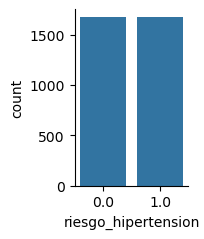

In [7]:
import seaborn as sb
sb.catplot(x = 'riesgo_hipertension',data=dataframe,kind="count", height=2.5, aspect=.8)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Cargar el dataset balanceado
balanced_data = pd.read_csv('Hipertension_Arterial_Mexico_balanced.csv')

# Separar características y variable objetivo
y = balanced_data['riesgo_hipertension']
x = balanced_data[['masa_corporal', 'tension_arterial', 'medida_cintura', 'peso', 'actividad_total', 'edad', 'estatura', 'sexo', 'sueno_horas', 'valor_hemoglobina_glucosilada', 'valor_insulina', 'resultado_glucosa_promedio', 'concentracion_hemoglobina', 'valor_colesterol_ldl', 'valor_trigliceridos']]

# Dividir en entrenamiento y prueba (si necesitas una nueva partición)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Entrenar un modelo
model = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
model.fit(x_train, y_train)

# Evaluar
predicciones = model.predict(x_test)
clasificadores = {0: "Sin riesgo", 1: "Con riesgo"}
target_names = list(clasificadores.values())
print("Reporte de clasificación:")
print(classification_report(y_test, predicciones, target_names=target_names))


Reporte de clasificación:
              precision    recall  f1-score   support

  Sin riesgo       0.97      0.99      0.98       479
  Con riesgo       0.99      0.97      0.98       524

    accuracy                           0.98      1003
   macro avg       0.98      0.98      0.98      1003
weighted avg       0.98      0.98      0.98      1003



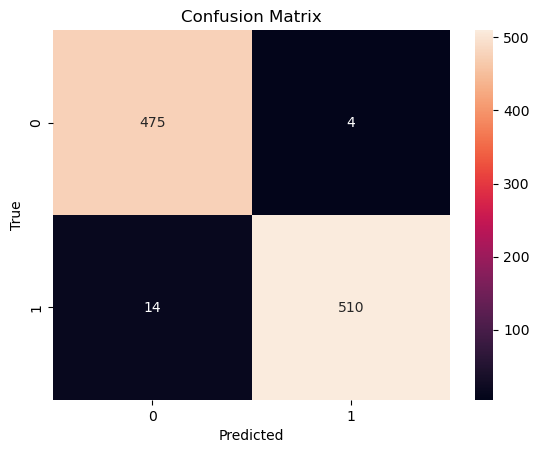

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt="d", xticklabels=clasificadores, yticklabels=clasificadores)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show();

In [10]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [11]:
from flask import Flask, jsonify, request
from threading import Thread
import time
app = Flask(__name__)

try:
    with open('model.pkl', 'rb') as f:
        model = pickle.load(f)
    print("Modelo cargado correctamente")
except Exception as e:
    print("Error al cargar el modelo:", str(e))
    modelo = None

@app.route('/predict', methods=['POST'])
def predict():
    try:
        req_json = request.get_json()
        print("Datos recibidos en la API:", req_json)
        input_data = pd.DataFrame(req_json)
        print("DataFrame creado:", input_data.to_dict())
    except Exception as e:
        print("Error al procesar JSON:", str(e))
        return jsonify({'error': str(e)}), 400

    if input_data.empty:
        print("Error: DataFrame vacío")
        return jsonify({'error': 'No data provided'}), 400

    expected_columns = ['masa_corporal', 'tension_arterial', 'medida_cintura', 'peso', 'actividad_total', 'edad', 'estatura', 'sexo', 'sueno_horas', 'valor_hemoglobina_glucosilada', 'valor_insulina', 'resultado_glucosa_promedio', 'concentracion_hemoglobina', 'valor_colesterol_ldl', 'valor_trigliceridos']
    if not all(col in input_data.columns for col in expected_columns):
        print("Error: Columnas faltantes", input_data.columns.tolist())
        return jsonify({'error': 'Missing required columns'}), 400
    
    try:
        predictions = model.predict(input_data)
        predictions = predictions.astype(int)
        predictions = [clasificadores[pred] for pred in predictions]
        probabilities = model.predict_proba(input_data).tolist()
        print("Predicciones realizadas:", predictions)
    except Exception as e:
        print("Error al hacer predicciones:", str(e))
        return jsonify({'error': 'Prediction failed'}), 500

    response = jsonify({
        'predictions': predictions,
        'probabilities': probabilities
    })
    response.status_code = 200
    print("Respuesta enviada:", response.get_json())
    return response

def run_flask():
    app.run(port=8001, use_reloader=False)

if __name__ == '__main__':
    Thread(target=run_flask).start()
    time.sleep(3)

Modelo cargado correctamente
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8001
Press CTRL+C to quit


In [12]:
test_data = pd.DataFrame({
    'masa_corporal': [31],
    'tension_arterial': [107],
    'medida_cintura': [88],
    'peso': [74.55],
    'actividad_total': [2],
    'edad': [41],
    'estatura': [147.3],
    'sexo': [2],
    'sueno_horas': [4],
    'valor_hemoglobina_glucosilada': [4],
    'valor_insulina': [4],
    'resultado_glucosa_promedio': [4],
    'concentracion_hemoglobina': [86],
    'valor_colesterol_ldl': [86],
    'valor_trigliceridos': [86]
})

data_json = test_data.to_json(orient='records')

print("Datos enviados en el POST:")
print(data_json)

headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}

try:
    print("Enviando solicitud POST a http://localhost:8001/predict")
    response = requests.post('http://localhost:8001/predict', data=data_json, headers=headers)
    print('\nConsulta a la API:')
    print('Status:', response.status_code)
    print('Respuesta:', response.json())
except Exception as e:
    print(f"Error al consultar la API: {e}")

Datos enviados en el POST:
[{"masa_corporal":31,"tension_arterial":107,"medida_cintura":88,"peso":74.55,"actividad_total":2,"edad":41,"estatura":147.3,"sexo":2,"sueno_horas":4,"valor_hemoglobina_glucosilada":4,"valor_insulina":4,"resultado_glucosa_promedio":4,"concentracion_hemoglobina":86,"valor_colesterol_ldl":86,"valor_trigliceridos":86}]
Enviando solicitud POST a http://localhost:8001/predict


127.0.0.1 - - [19/May/2025 18:58:04] "POST /predict HTTP/1.1" 200 -


Datos recibidos en la API: [{'masa_corporal': 31, 'tension_arterial': 107, 'medida_cintura': 88, 'peso': 74.55, 'actividad_total': 2, 'edad': 41, 'estatura': 147.3, 'sexo': 2, 'sueno_horas': 4, 'valor_hemoglobina_glucosilada': 4, 'valor_insulina': 4, 'resultado_glucosa_promedio': 4, 'concentracion_hemoglobina': 86, 'valor_colesterol_ldl': 86, 'valor_trigliceridos': 86}]
DataFrame creado: {'masa_corporal': {0: 31}, 'tension_arterial': {0: 107}, 'medida_cintura': {0: 88}, 'peso': {0: 74.55}, 'actividad_total': {0: 2}, 'edad': {0: 41}, 'estatura': {0: 147.3}, 'sexo': {0: 2}, 'sueno_horas': {0: 4}, 'valor_hemoglobina_glucosilada': {0: 4}, 'valor_insulina': {0: 4}, 'resultado_glucosa_promedio': {0: 4}, 'concentracion_hemoglobina': {0: 86}, 'valor_colesterol_ldl': {0: 86}, 'valor_trigliceridos': {0: 86}}
Predicciones realizadas: ['Con riesgo']
Respuesta enviada: {'predictions': ['Con riesgo'], 'probabilities': [[0.10666666666666667, 0.8933333333333333]]}

Consulta a la API:
Status: 200
Respu